## Contents  
<ol>
    <b><li>Importing libraries</li></b>
    <li><b>Import and organizing the data</b>
        <ol>
            <li> Load .arff files and converet it dataframes. </li>
            <li>Change header, convert data type and the class label types to float and int respectively. </li>
        </ol>
    </li>
    <li><b>Data Analysis and Preprocessing</b>
        <ol>
            <li>Missing Values Analysis
                <ol>
                    
                    
<li>Create a sparsity matrix to visualize the distribution of missing data</li>
                    <li>Generate heat maps to visualize the distribution of missing data</li>
                </ol>
            </li>
            <li>Data Imputation
                <ol>
                    <li>Data Imputation Functions</li>
                    <li>Developing a Data Imputation Library</li>
                </ol>
            </li>
            <li>Mitigating Imbalanced Data
                <ol>
                    <li>Implementing a Function to Assess Class Imbalance Across Dataframes</li>
                    <li>Implementation of Oversampling Methods to Address Class Imbalance</li>
                </ol>
            </li>
        </ol>
    </li>
    <li><b>Modeling Data: Constructing Classification Models</b>
        <ol>
            <li>K-Fold Cross-Validation: Data Splitting</li>
            <li>Models
                <ol>
                    <li>Decision Tree classifier (DT)</li>
                    <li>Support Vector Machine (SVM)</li>
                    <li>Artificial Neural Network (ANN)</li>
                    <li>Construct an Ordered Dictionary for All Classifiers</li>
                </ol>
            </li>
        </ol>
    </li>
    <li><b>Model Analysis</b>
        <ol>
            <li>Model ranking</li>
            <li>Organize the Various Model Results</li>
            <li>Examine Accuracy Results for First Year Data Across Various Models, Imputation Techniques, and Data Balancing Methods</li>
        </ol>
</ol>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tabulate

In [3]:
!pip install imbalanced-learn

## <b>  1. Import Libries </b>

In [4]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno

#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold

# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# Impoting classification models

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape, Flatten
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


import seaborn as sns
import matplotlib.pyplot as plt

<a id="intro"></a>
## <b> 2. Import and Introduce the Polish Dataset </b>

In this study, The <b> dataset</b> can be accessed at [here](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data) [1]. The dataset examined is that of bankrupt Polish companies  that were analysed between the years 2000 and 2012, while those of non-bankrupt Polish companies was examined between the years 2007 and 2013.

The Emerging Markets Information Service (EMIS) [2], provides market information of the dataset.Moreover, this dataset will be utilized for classifying and predicting the likelihood of bankruptcy for Polish companies. The Polish dataset contains a total of **5 .arff data files** name as **`1year`, `2year`, `3year`, `4year`, `5year`** and each will be mention below.

• <b>1st_year:</b> In the first year of the forecasting period, financial rates from the first year are included along with their corresponding coefficients class labelindicating the bankruptcy status after five years.


• <b>2nd_year:</b> In the second year, financial rates for the second year of the forecasting period are included, along with a class label indicating the status of the company after four years.

• <b>3rd_year:</b> During the third year of the forecasting period, financial rates are presented along with corresponding class labels which indicate whether bankruptcy has taken place or not after three years.

• <b>4th_year:</b> It includes the financial rates from the fourth year of the forecasting period as well as the corresponding class label indicating the status of bankrupt after two years.

• <b>5th_year:</b> A class label for the 5th year indicates bankruptcy status after one year based on financial rates from the 5th year of the forecasting period.


### <b> 2.A. Write functions to do the following:  </b>


The first function (def download_arff_files()) load the .arfffiles.

• The next function (dataframes = arff_to_dataframe()) convert the .arfffiles to dataframes.

• Then print the dataframes head


In [5]:
def download_arff_files():
    # Define the number of .arff files to load
    N = 5
    # Create an empty list to store the loaded data
    arff_datasets = []
    # Loop through each file index from 1 to 5
    for i in range(N):
        # Construct the file path for the current file in Google Drive
        #file_path = f'data/{i+1}year.arff'
        file_path = f'/content/drive/MyDrive/GitHubPolish DataSet/Data 2024/polish+companies+bankruptcy+data/{i+1}year.arff'
        # Load the data from the current file using arff.loadarff() function and Append the loaded data to the list
        arff_datasets.append(arff.loadarff(file_path))
    # Return the list containing loaded data from all .arff files
    return arff_datasets


#this function will convert the .arff file datasets to dataframes
def arff_to_dataframe():
    arff_datasets = download_arff_files()
    dataframes = []
    for data_i_year in arff_datasets:
        # Create DataFrame
        dataframes.append(pd.DataFrame(data_i_year[0]))
    return dataframes

# Call the arff_to_dataframe() function to load the dataframes
dataframes = arff_to_dataframe()

# Now you can access the first dataframe and print its head
print(dataframes[0].head())

      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class  
0   82.

### <b> 2.B. Write functions to do the following: </b>


- change the headers in each dataframes to x1, x2, to x64 and the class lable as Y.

- Convert the data types to float.

- Convert the class label to integer

In [6]:
def rename_and_convert_columns(dataframes):
    renamed_dataframes = []
    for df in dataframes:
        # Rename attribute columns
        attribute_names = ['x{}'.format(i) for i in range(1, 65)]
        df.columns = attribute_names + ['Y']

        # Convert data types to float for attributes
        df[attribute_names] = df[attribute_names].astype(float)

        # Convert class labels to int
        df['Y'] = df['Y'].astype(int)

        renamed_dataframes.append(df)
    return renamed_dataframes

# Apply renaming and data type conversion to each DataFrame
modified_dataframes = rename_and_convert_columns(dataframes)

# Print the first few rows of the first DataFrame for example
print(modified_dataframes[0].head())

# Print the data types of the first DataFrame for example
print(modified_dataframes[0].dtypes)


         x1       x2       x3      x4       x5       x6        x7       x8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

       x9      x10  ...       x56      x57      x58       x59     x60     x61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

       x62     x63      x64  Y  
0   82.658 

## <b> 3. Data Analysis and Preprocessing </b>

### <b>3.A. Missing Values Analysis </b>

In [ ]:
from tabulate import tabulate

def calculate_missing_values_stats(modified_dataframes, verbose=False):
    clean_dataframes = [df.dropna(axis=0, how='any') for df in modified_dataframes]
    if verbose:
        table_data = []
        for i, df in enumerate(modified_dataframes):
            total_instances = len(df)
            total_instances_with_missing_values = total_instances - len(clean_dataframes[i])
            total_instances_without_missing_values = len(clean_dataframes[i])
            data_loss = total_instances_with_missing_values / total_instances * 100 if total_instances > 0 else 0
            table_data.append([i + 1, total_instances, total_instances_with_missing_values, total_instances_without_missing_values, data_loss])

        # Create a table with the calculated data
        headers = ['\033[1mYear\033[0m', '\033[1mTotal Instances\033[0m', '\033[1mInstances with Missing Values\033[0m', '\033[1mInstances without Missing Values\033[0m', '\033[1mData Loss (%)\033[0m']
        table = tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center")

        # Display the table
        print(table)

    return clean_dataframes

missing_values_stats = calculate_missing_values_stats(modified_dataframes, verbose=True)

╒════════╤═══════════════════╤═════════════════════════════════╤════════════════════════════════════╤═════════════════╕
│  Year  │  Total Instances  │  Instances with Missing Values  │  Instances without Missing Values  │  Data Loss (%)  │
╞════════╪═══════════════════╪═════════════════════════════════╪════════════════════════════════════╪═════════════════╡
│   1    │       7027        │              3833               │                3194                │     54.5467     │
├────────┼───────────────────┼─────────────────────────────────┼────────────────────────────────────┼─────────────────┤
│   2    │       10173       │              6085               │                4088                │     59.8152     │
├────────┼───────────────────┼─────────────────────────────────┼────────────────────────────────────┼─────────────────┤
│   3    │       10503       │              5618               │                4885                │     53.4895     │
├────────┼───────────────────┼──────────

The missing values analysis shows that each of the 5 dataframes contains a significant number of rows with missing data in at least one of the features. The analysis estimated that more than half of these dataframes contain missing data rows.



### <b> 3.A.1. Create a sparsity matrix to visualize the distribution of missing data. </b>

Following the discovery that there is a significant amount of missing data, we should examine whether there is a correlation between the missing data and the observed data. In the missingno library, the matrix function provides us with a sparsity matrix which provides us with information regarding data gaps.

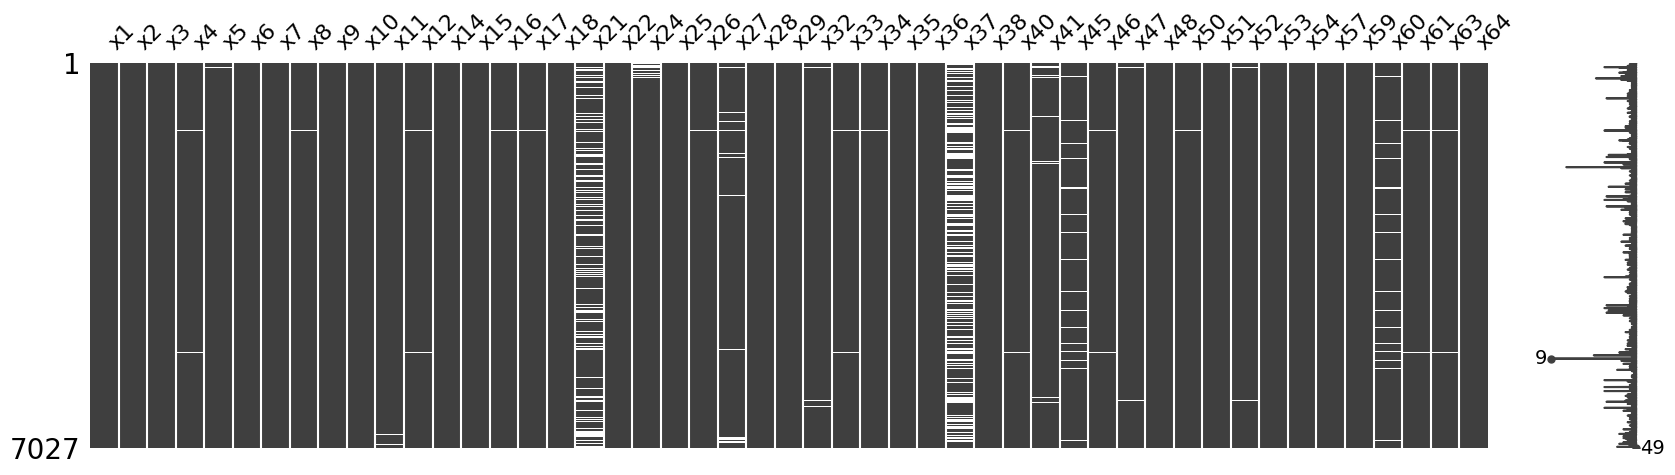

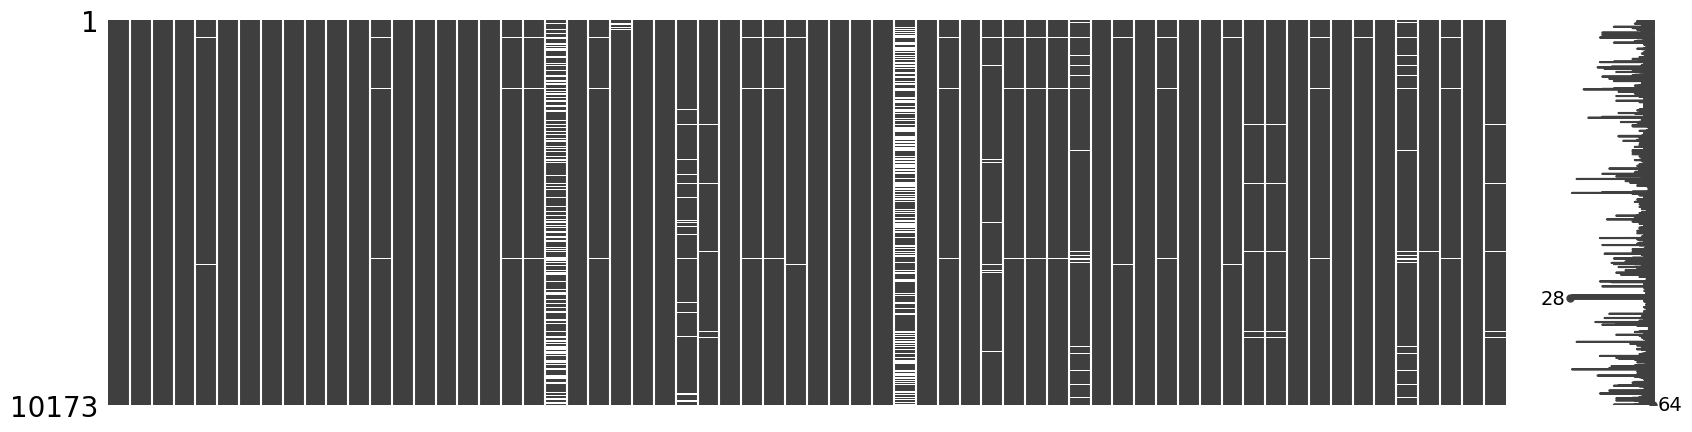

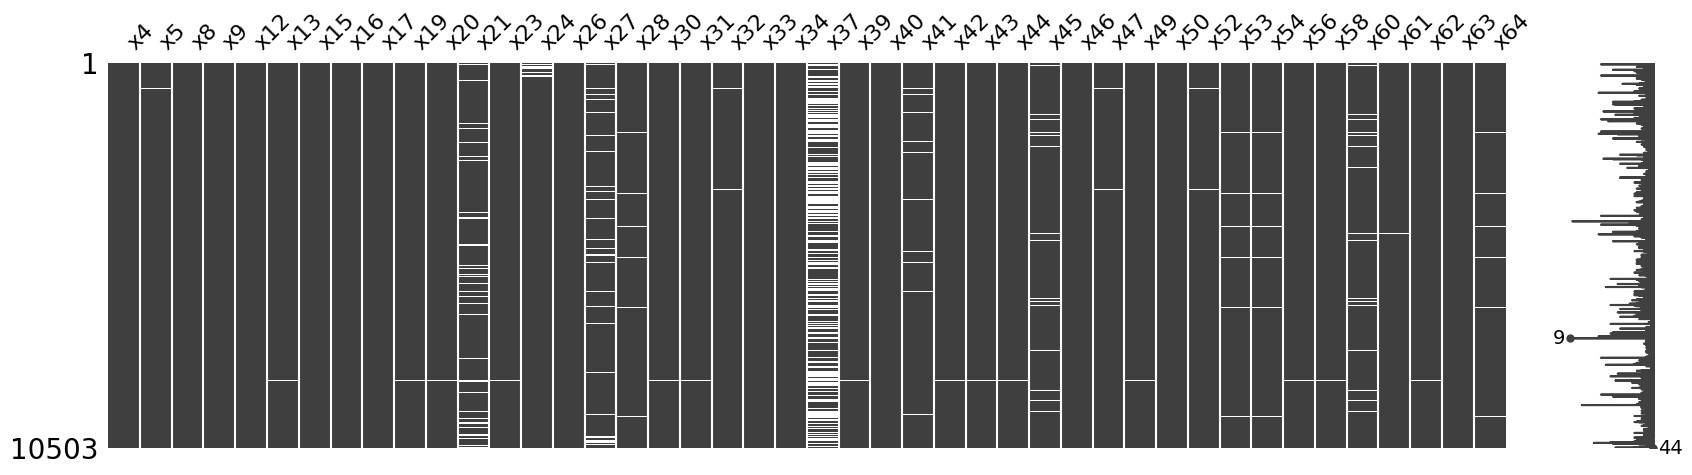

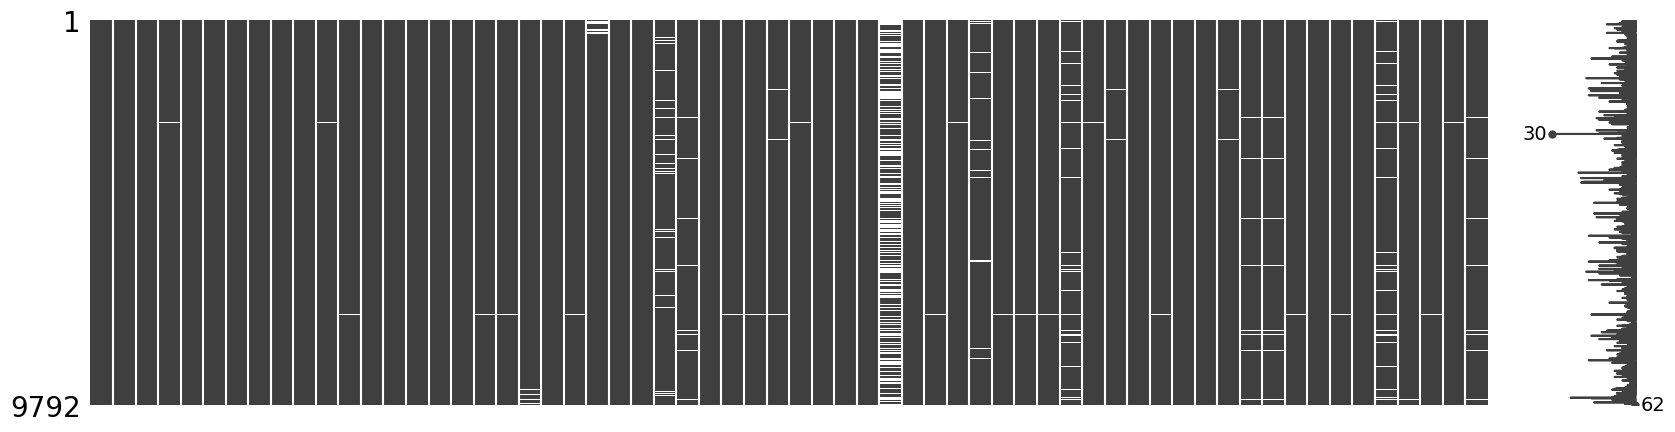

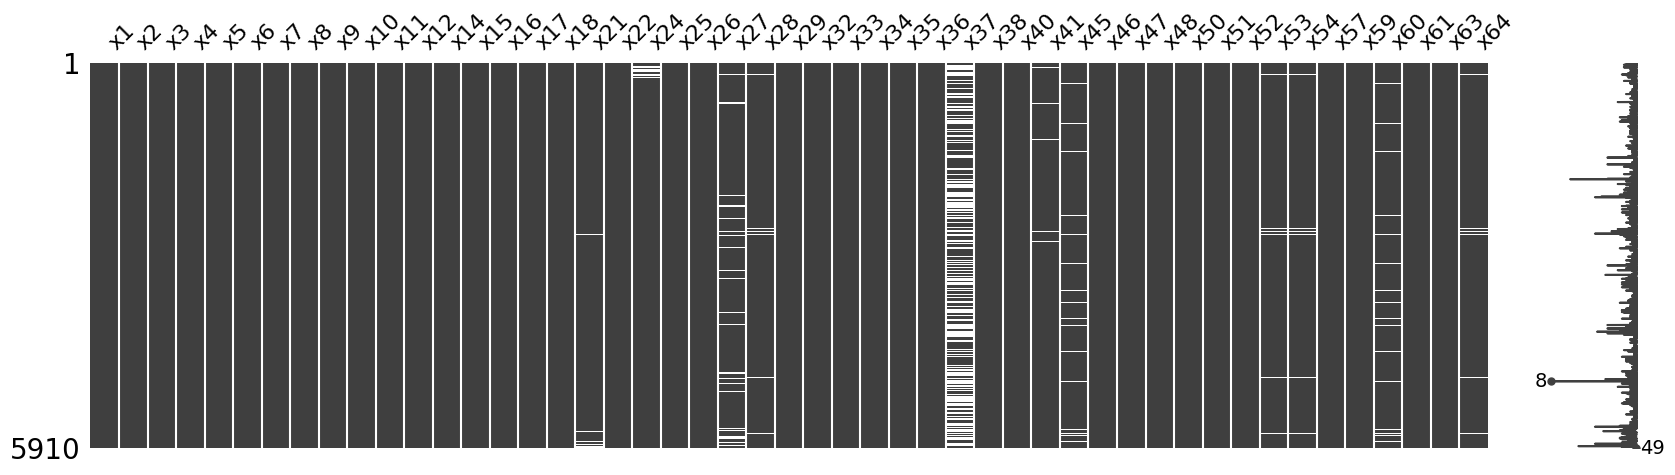

In [ ]:
# generate the sparsity matrix (figure) for all the dataframes
def generate_sparsity_matrix(dfs):
    for i in range(5):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.matrix(dfs[i][missing_df_i], figsize=(20,5))

generate_sparsity_matrix(modified_dataframes)

Based on the sparsity plots of all five dataframes above, we can see that there is a lot of sparsity among most of the features from all the dataframes, this means that nearly all features contain some degree of missing data samples. Feature X37 exhibits the highest level of sparsity across all datasets Additionally, x21 appears to be sparse in most dataframes but not all.

Based on the sparsity plots, we can determine the extent of data sparsity, but we cannot ascertain whether the missing of data isentirely at random or if there are correlations among missing values across features. In the next step, we aim to investigate potential correlations among features to understand if there are patterns to the of missing values.

It's evident that indiscriminately dropping rows with missing values or removing features with missing values is not a viable approach for handling missing data. Such strategies result in significant data loss, undermining the integrity and utility of the dataset.

### <b>3.A.2. Generate heat maps to visualize the distribution of missing data. </b>

Now, let's investigate whether there are correlations among the missing features.

We'll utilize the `heatmap` function from the `missingno` library to plot heatmaps for all the dataframes.

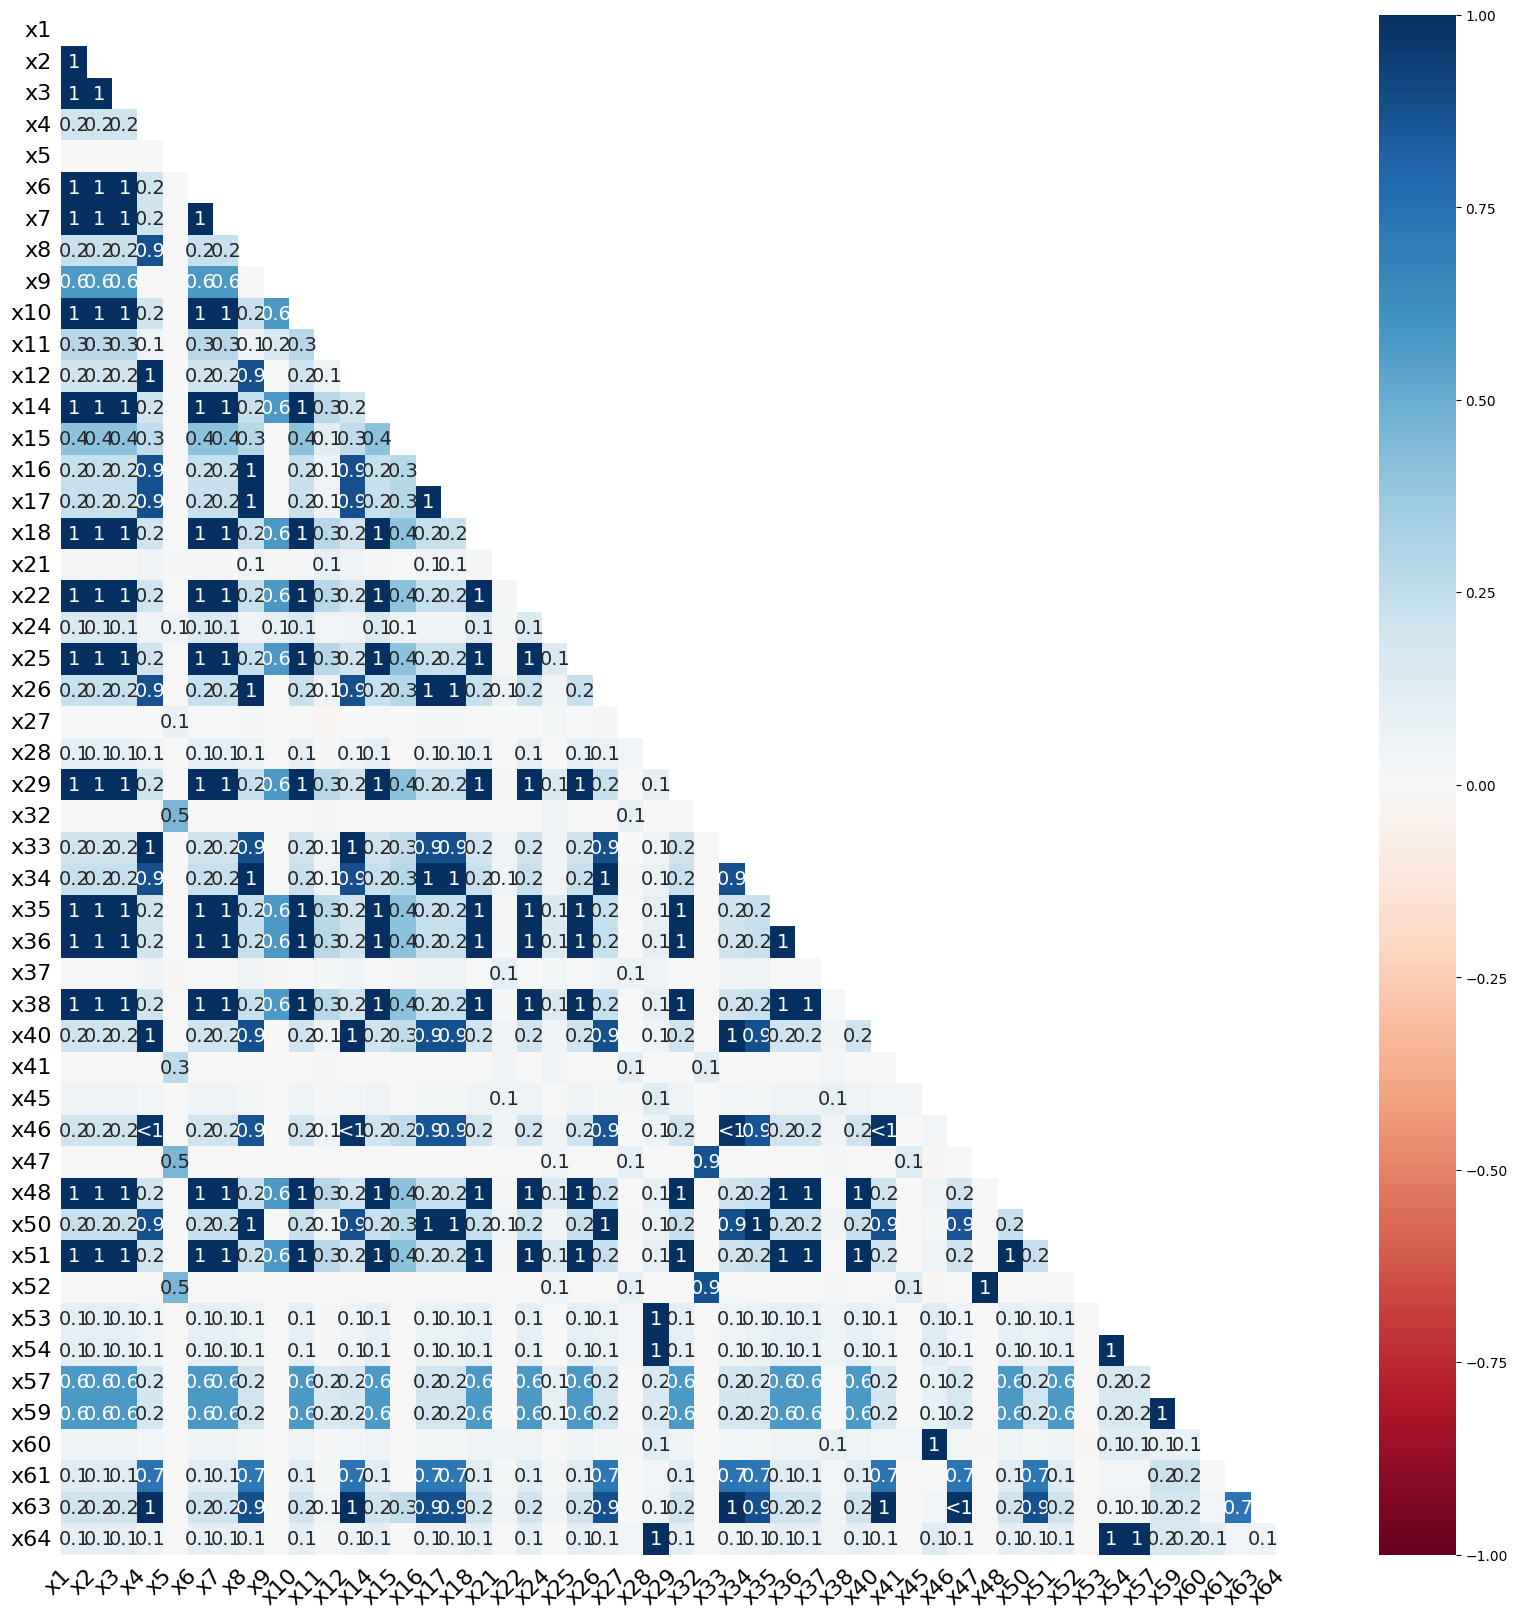

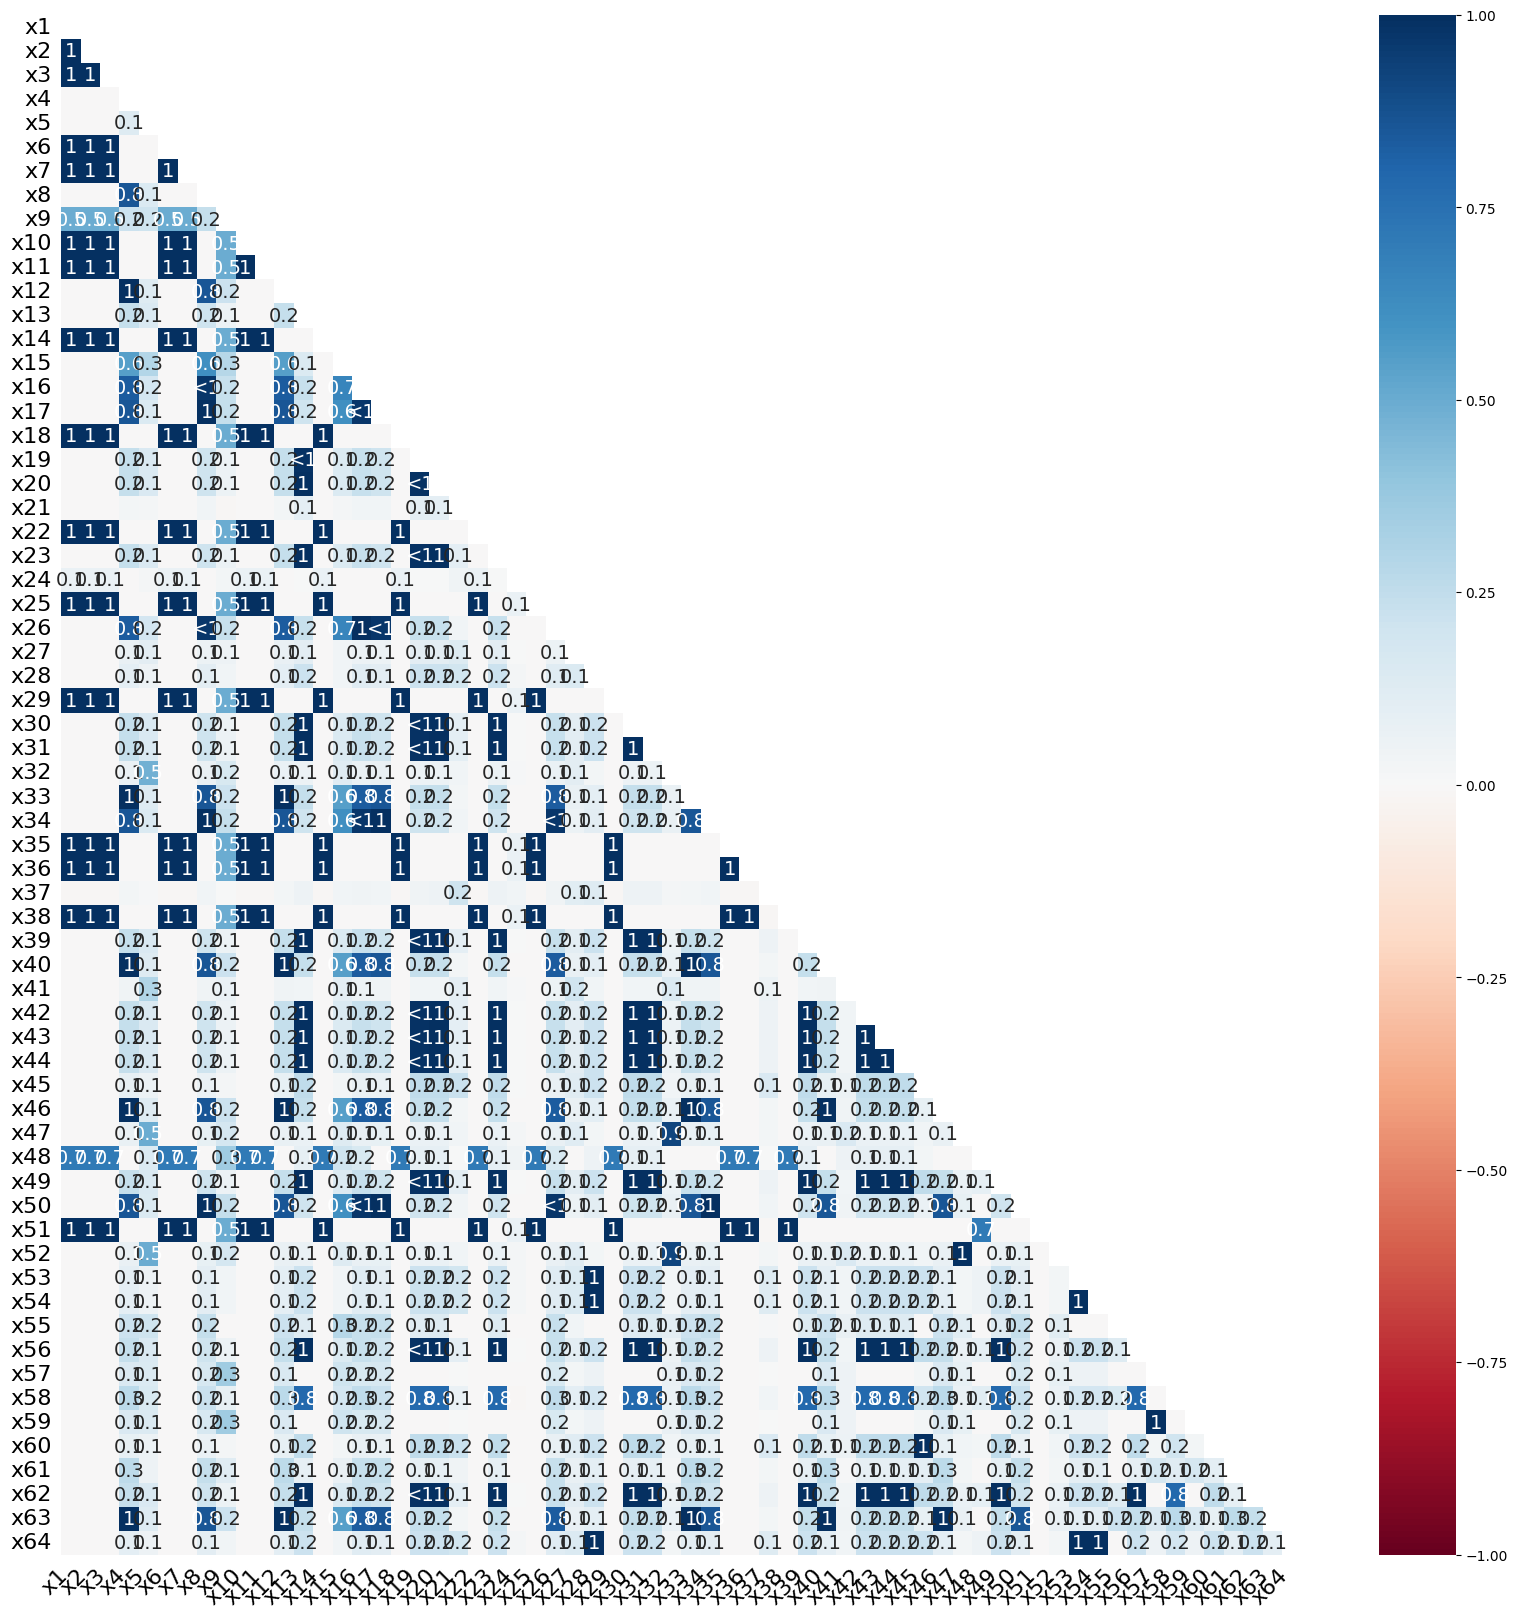

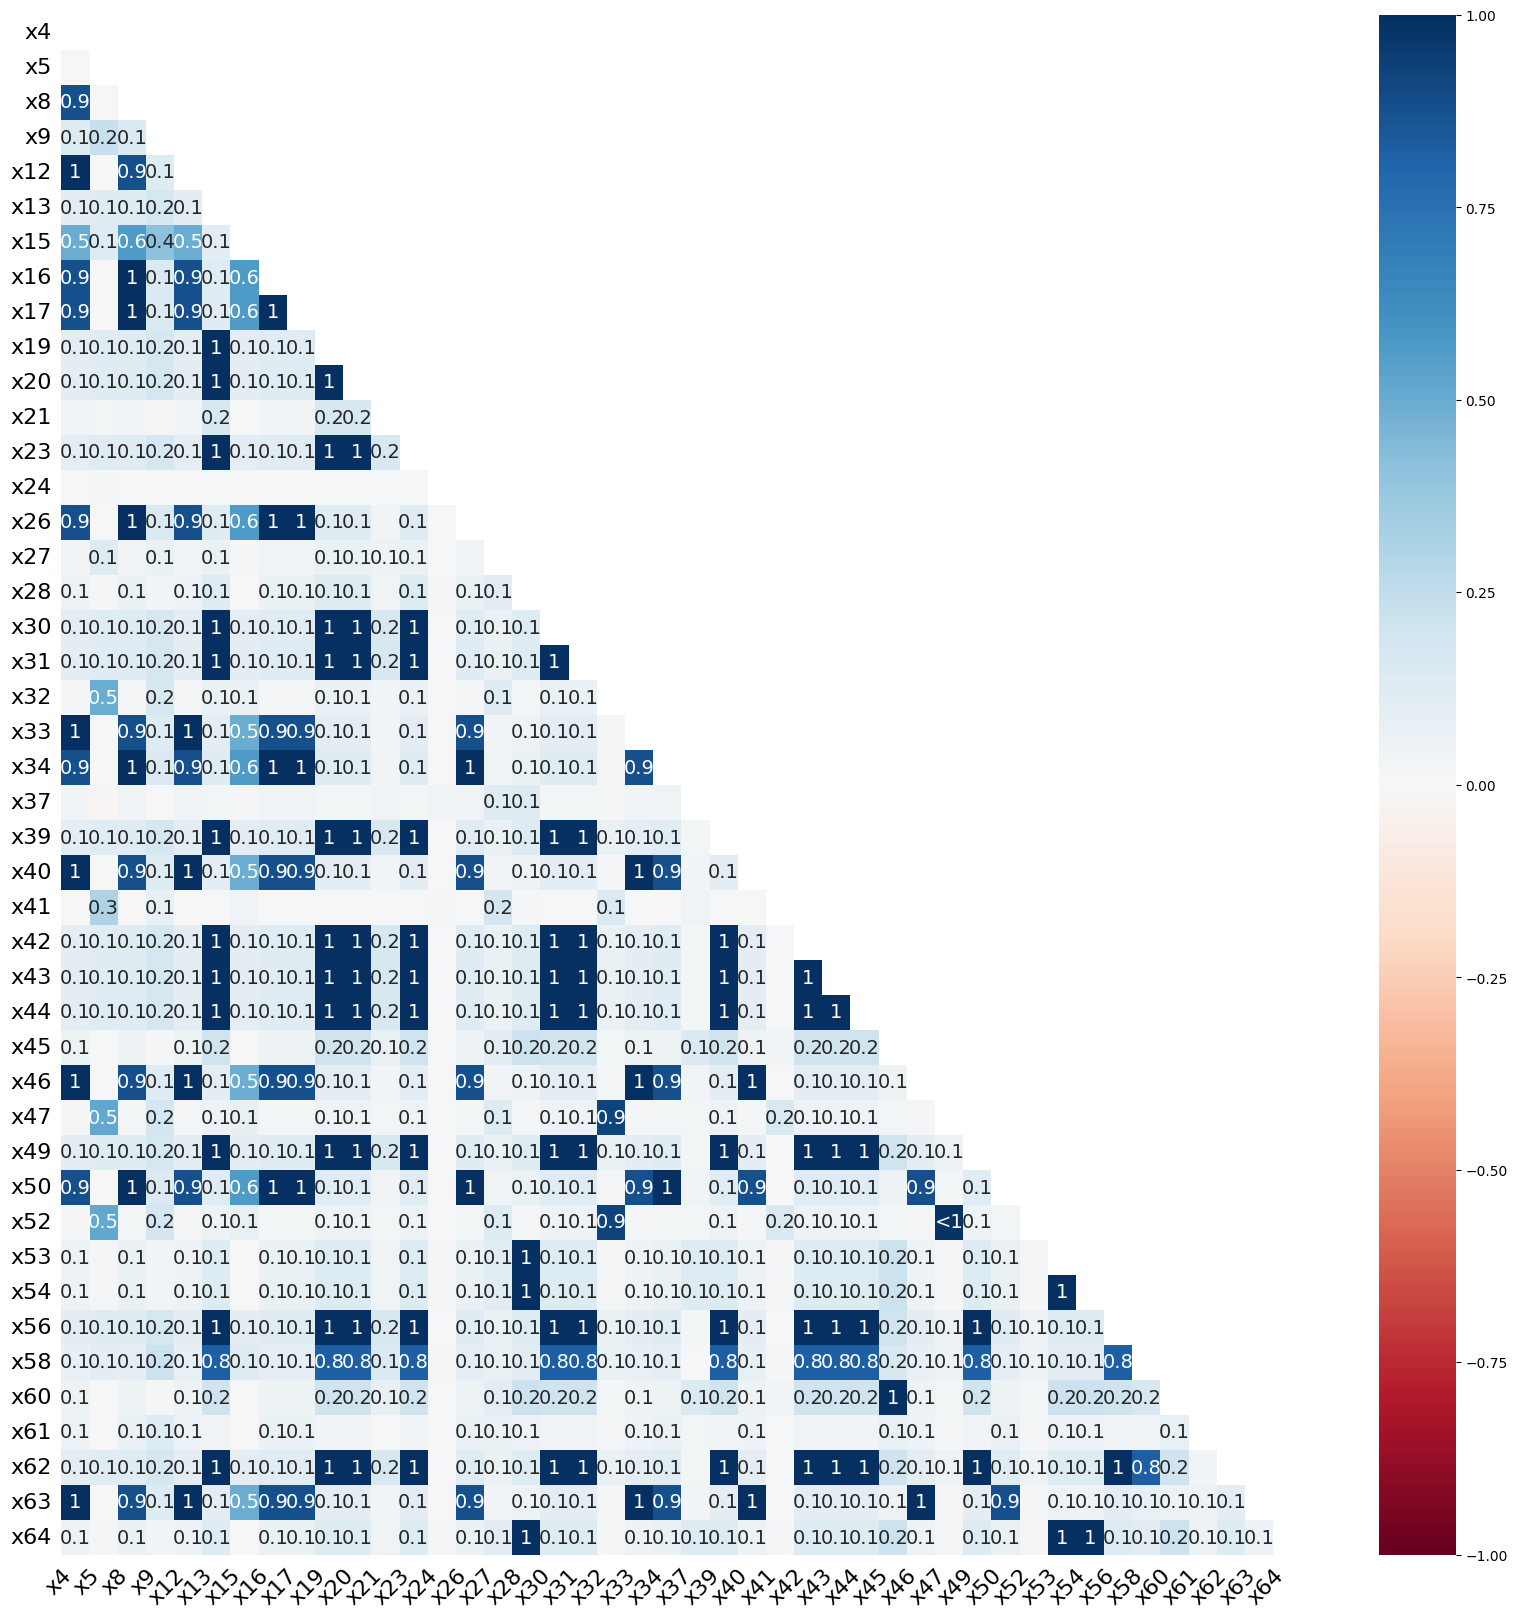

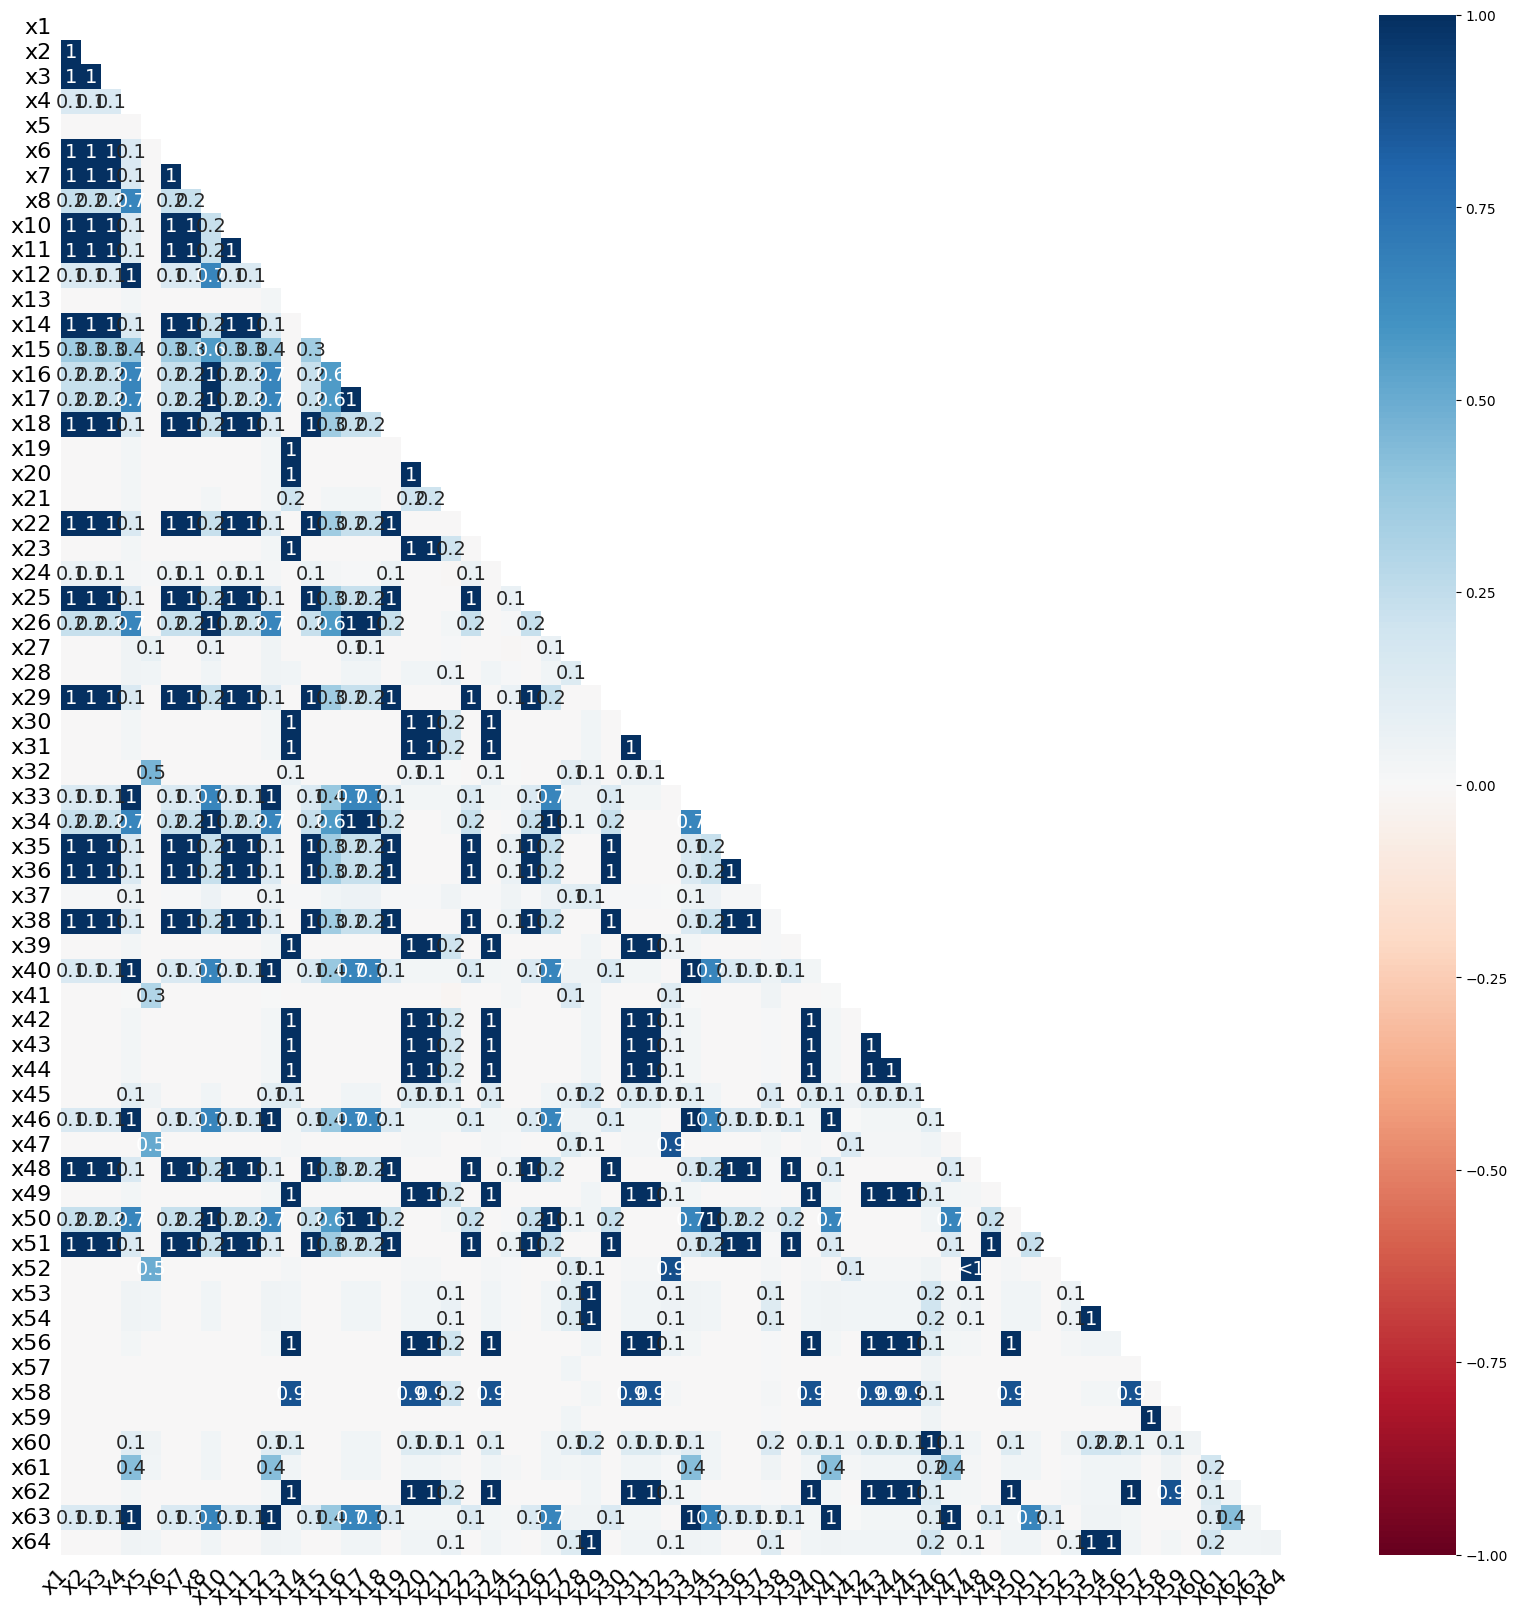

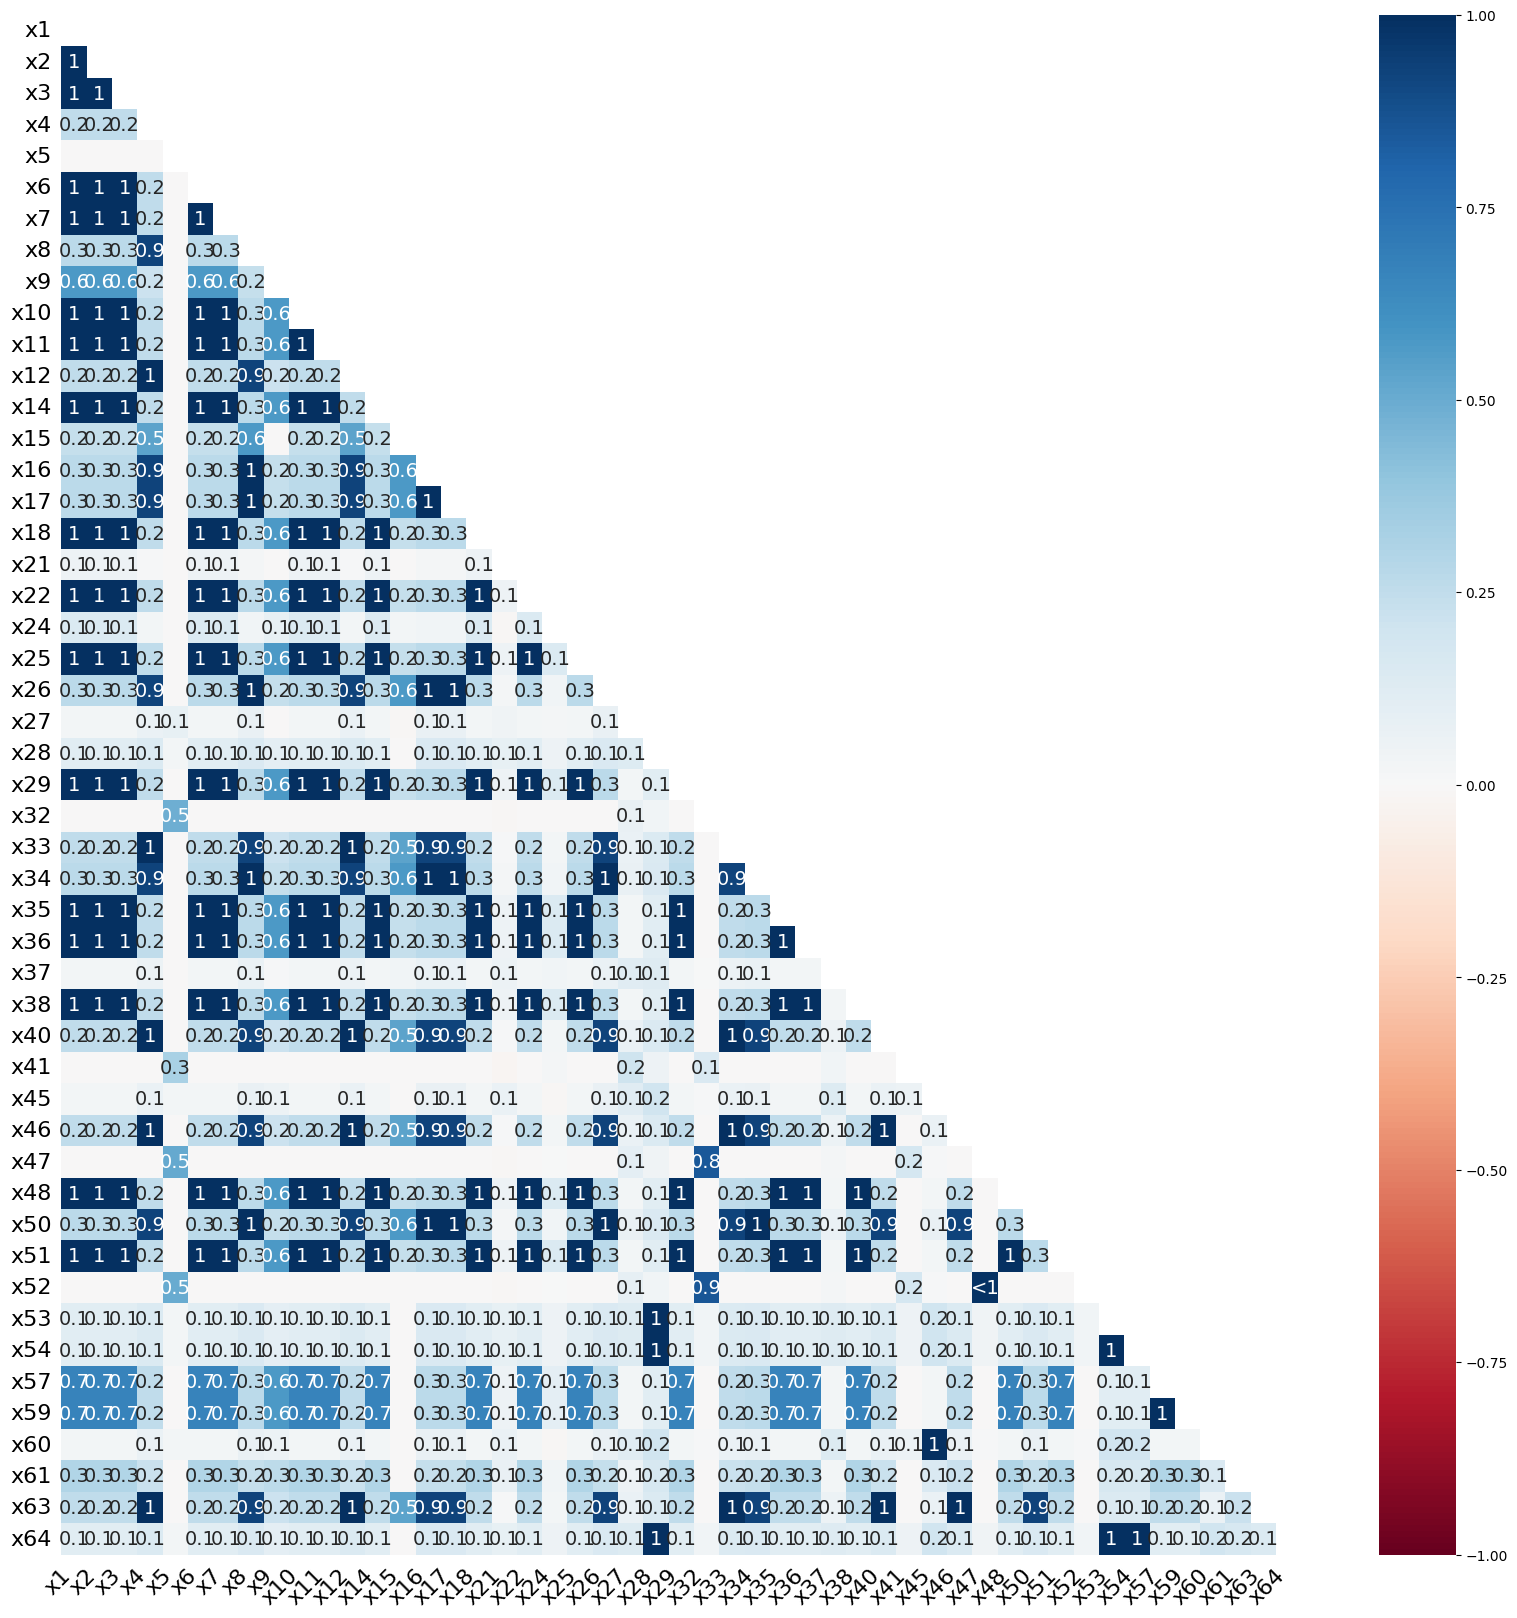

In [ ]:
# generate the heatmap for all the dataframes
def generate_heatmap(dfs):
    for i in range(5):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.heatmap(dfs[i][missing_df_i], figsize=(20,20))

generate_heatmap(modified_dataframes)

 The heatmaps above represent the degree of correlation between missing values across different features for all five dataframes. The nullity correlation ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.


The heatmaps exclude features with no missing values. Additionally, if the nullity correlation is close to zero (-0.05 < R < 0.05), no value will be displayed on the heatmap.


A perfect positive nullity correlation (R=1) indicates that when there are missing values for the first feature, there are also missing values for the second feature in the corresponding rows.
       

A perfect negative nullity correlation (R=-1) indicates that when one feature has missing values, the corresponding rows do not have missing values for the second feature, and vice versa.       


The key observation is that within each dataframe, certain features exhibit strong correlations (R = 1 or -1), while others show minimal correlation (R values close to 0).   

### <B> 3.B. Data Imputation </B>


Imputation in statistics refers to the procedure of using alternative values in place of missing data.
   
It is now evident that we need to fill in the missing values to address the gaps in the data, as simply dropping rows with missing values or removing features with missing values is not a viable solution based on the missing value analysis.

We aim to explore several widely used missing data imputation techniques


<b> Mean Imputation</b>: Fill missing values with the mean of the respective column.

<b>Median Imputation</b>: Fill missing values with the median of the respective column.

<b>Interpolation</b>: Interpolate missing values based on neighboring values in the column.


### <b>3.B.1. Data Imputation Functions </b>

In [7]:
def mean_imputation(modified_dataframes):
    imputed_dataframes = []
    for df in modified_dataframes:
        imputed_df = df.fillna(df.mean())
        imputed_dataframes.append(imputed_df)
    return imputed_dataframes

def median_imputation(modified_dataframes):
    imputed_dataframes = []
    for df in modified_dataframes:
        imputed_df = df.fillna(df.median())
        imputed_dataframes.append(imputed_df)
    return imputed_dataframes

def interpolation(modified_dataframes):
    imputed_dataframes = []
    for df in modified_dataframes:
        imputed_df = df.interpolate(method='linear', axis=0)
        imputed_dataframes.append(imputed_df)
    return imputed_dataframes

# Example usage:
imputed_data_mean = mean_imputation(modified_dataframes)
imputed_data_median = median_imputation(modified_dataframes)
imputed_data_interpolation = interpolation(modified_dataframes)

### <b>3.B.2. Developing a Data Imputation Library </b>

Following the stpes above,  we have been able to create three different data imputation functions to create different imputed dataframes.

To allow future reuse of these imputed dataframes, we create a dictionary below.


In [8]:
imputed_dataframes_dictionary = OrderedDict()
imputed_dataframes_dictionary['Mean'] = imputed_data_mean
imputed_dataframes_dictionary['Median'] = imputed_data_median
imputed_dataframes_dictionary['Data Interpolation'] = imputed_data_interpolation

### <b>3.C. Mitigating Imbalanced Data   </b>


In the preceding steps, we have effectively addressed missing data. However, we have yet to address the potential issue of class imbalance within the dataset. In simpler terms, data imbalance occurs when samples belonging to one or more 'majority' class labels significantly outnumber those belonging to other 'minority' classes.

The presence of data imbalance can have a profound impact on modeling, as models may not receive adequate data from minority classes for training. This can result in biased models, ultimately leading to suboptimal performance on test data.

To begin, let us assess the extent of imbalance within our dataset and determine whether it exists.

### <b>3.C.1. Implementing a Function to Assess Class Imbalance Across Dataframes
</b>

In [ ]:
from tabulate import tabulate

def check_data_imbalance(modified_dataframes):
    for i in range(len(modified_dataframes)):
        print('Dataset: '+str(i+1)+' year')
        print(tabulate(modified_dataframes[i].groupby('Y').size().reset_index(name='Count'), headers=['Label', 'Count'], tablefmt='grid'))
        minority_percent = (modified_dataframes[i]['Y'].tolist().count(1) / len(modified_dataframes[i]['Y'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)

check_data_imbalance(modified_dataframes)

Dataset: 1 year
+----+---------+---------+
|    |   Label |   Count |
+====+=========+=========+
|  0 |       0 |    6756 |
+----+---------+---------+
|  1 |       1 |     271 |
+----+---------+---------+
Minority (label 1) percentage: 3.856553294435748%
----------------------------------------------------------------
Dataset: 2 year
+----+---------+---------+
|    |   Label |   Count |
+====+=========+=========+
|  0 |       0 |    9773 |
+----+---------+---------+
|  1 |       1 |     400 |
+----+---------+---------+
Minority (label 1) percentage: 3.931976801336872%
----------------------------------------------------------------
Dataset: 3 year
+----+---------+---------+
|    |   Label |   Count |
+====+=========+=========+
|  0 |       0 |   10008 |
+----+---------+---------+
|  1 |       1 |     495 |
+----+---------+---------+
Minority (label 1) percentage: 4.712939160239932%
----------------------------------------------------------------
Dataset: 4 year
+----+---------+--------


As observed in the previous step, significant data imbalance exists within our datasets, as evidenced by the low percentage of minority class (label 1) samples relative to their respective datasets. Given the substantial magnitude of this data imbalance, leaving the datasets unaltered will likely result in poorly trained models.


### <b> 3.C.2. Implementation of Oversampling Methods to Address Class Imbalance </b>

The following techniques were utilized to address the class imbalance within the dataset.

Synthetic Minority Over Sampling Technique (SMOTE)

Synthetic Minority Over-sampling Technique + Edited Nearest Neighbors (SMOTEENN)

Synthetic Minority Over-sampling Technique + Tomek links (SMOTE_Tomek)

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

def split_dataframes_features_labels(dfs):
    feature_cols = [f'x{i}' for i in range(1, 65)]  # Assuming the feature columns are named 'x1' to 'x64'
    feature_dfs = [df[feature_cols] for df in dfs]
    label_dfs = [df['Y'] for df in dfs]  # Assuming the label column is named 'Y'
    return feature_dfs, label_dfs

# Utility function to perform SMOTE oversampling on given dataframes
def oversample_data_SMOTE(dfs, verbose=False):
    smote = SMOTE(random_state=42, k_neighbors=10)
    feature_dfs, label_dfs = split_dataframes_features_labels(dfs)
    resampled_feature_arrays = []
    resampled_label_arrays = []
    for i in range(len(dfs)):
        if verbose:
            print('SMOTE Oversampling for ' + str(i+1) + ' year:')
            print('Original dataset shape {}'.format(Counter(label_dfs[i])))
        dfi_features_res, dfi_label_res = smote.fit_resample(feature_dfs[i], label_dfs[i])
        if verbose:
            print('Resampled dataset shape {}\n'.format(Counter(dfi_label_res)))
        resampled_feature_arrays.append(dfi_features_res)
        resampled_label_arrays.append(dfi_label_res)
    return resampled_feature_arrays, resampled_label_arrays

# Utility function to perform SMOTE-ENN oversampling on given dataframes
def oversample_data_SMOTEENN(dfs, verbose=False):
    smote_enn = SMOTEENN(random_state=42)
    feature_dfs, label_dfs = split_dataframes_features_labels(dfs)
    resampled_feature_arrays = []
    resampled_label_arrays = []
    for i in range(len(dfs)):
        if verbose:
            print('SMOTE-ENN Oversampling for ' + str(i+1) + ' year:')
            print('Original dataset shape {}'.format(Counter(label_dfs[i])))
        dfi_features_res, dfi_label_res = smote_enn.fit_resample(feature_dfs[i], label_dfs[i])
        if verbose:
            print('Resampled dataset shape {}\n'.format(Counter(dfi_label_res)))
        resampled_feature_arrays.append(dfi_features_res)
        resampled_label_arrays.append(dfi_label_res)
    return resampled_feature_arrays, resampled_label_arrays

# Utility function to perform SMOTE-Tomek oversampling on given dataframes
def oversample_data_SMOTETomek(dfs, verbose=False):
    smote_tomek = SMOTETomek(random_state=42)
    feature_dfs, label_dfs = split_dataframes_features_labels(dfs)
    resampled_feature_arrays = []
    resampled_label_arrays = []
    for i in range(len(dfs)):
        if verbose:
            print('SMOTE-Tomek Oversampling for ' + str(i+1) + ' year:')
            print('Original dataset shape {}'.format(Counter(label_dfs[i])))
        dfi_features_res, dfi_label_res = smote_tomek.fit_resample(feature_dfs[i], label_dfs[i])
        if verbose:
            print('Resampled dataset shape {}\n'.format(Counter(dfi_label_res)))
        resampled_feature_arrays.append(dfi_features_res)
        resampled_label_arrays.append(dfi_label_res)
    return resampled_feature_arrays, resampled_label_arrays

# Utility function to convert the arrays of features and labels to pandas dataframes and re-assign column headers
def restructure_arrays_to_dataframes(feature_arrays, label_arrays):
    resampled_dfs = []
    for i in range(len(feature_arrays)):
        feature_df = pd.DataFrame(data=feature_arrays[i])
        label_df = pd.DataFrame(data=label_arrays[i], columns=['Y'])
        resampled_dfs.append(feature_df.join(label_df))
    return resampled_dfs

# Function to perform oversampling on imputed dataframes and return them in a dictionary
def perform_oversampling_on_imputed_dataframes(df_dict):
    imputed_oversampled_dataframes_dictionary = OrderedDict()
    for key, dfs in df_dict.items():
        print('Oversampling for ' + key + ' imputed dataframes\n')
        # Perform SMOTE oversampling
        smote_feature_arrays, smote_label_arrays = oversample_data_SMOTE(dfs, verbose=True)
        oversampled_dataframes = restructure_arrays_to_dataframes(smote_feature_arrays, smote_label_arrays)
        imputed_oversampled_dataframes_dictionary[key + ' SMOTE'] = oversampled_dataframes
        # Perform SMOTE-ENN oversampling
        smoteenn_feature_arrays, smoteenn_label_arrays = oversample_data_SMOTEENN(dfs, verbose=True)
        oversampled_dataframes = restructure_arrays_to_dataframes(smoteenn_feature_arrays, smoteenn_label_arrays)
        imputed_oversampled_dataframes_dictionary[key + ' SMOTE-ENN'] = oversampled_dataframes
        # Perform SMOTE-Tomek oversampling
        smotetomek_feature_arrays, smotetomek_label_arrays = oversample_data_SMOTETomek(dfs, verbose=True)
        oversampled_dataframes = restructure_arrays_to_dataframes(smotetomek_feature_arrays, smotetomek_label_arrays)
        imputed_oversampled_dataframes_dictionary[key + ' SMOTE-Tomek'] = oversampled_dataframes
        print('-'*100)
    return imputed_oversampled_dataframes_dictionary

# Perform oversampling on the imputed dataframes
imputed_oversampled_dataframes_dictionary = perform_oversampling_on_imputed_dataframes(imputed_dataframes_dictionary)

Oversampling for Mean imputed dataframes

SMOTE Oversampling for 1 year:
Original dataset shape Counter({0: 6756, 1: 271})
Resampled dataset shape Counter({0: 6756, 1: 6756})

SMOTE Oversampling for 2 year:
Original dataset shape Counter({0: 9773, 1: 400})
Resampled dataset shape Counter({0: 9773, 1: 9773})

SMOTE Oversampling for 3 year:
Original dataset shape Counter({0: 10008, 1: 495})
Resampled dataset shape Counter({0: 10008, 1: 10008})

SMOTE Oversampling for 4 year:
Original dataset shape Counter({0: 9277, 1: 515})
Resampled dataset shape Counter({0: 9277, 1: 9277})

SMOTE Oversampling for 5 year:
Original dataset shape Counter({0: 5500, 1: 410})
Resampled dataset shape Counter({0: 5500, 1: 5500})

SMOTE-ENN Oversampling for 1 year:
Original dataset shape Counter({0: 6756, 1: 271})
Resampled dataset shape Counter({1: 5908, 0: 4966})

SMOTE-ENN Oversampling for 2 year:
Original dataset shape Counter({0: 9773, 1: 400})
Resampled dataset shape Counter({1: 8538, 0: 7088})

SMOTE-ENN


## <b> 4. Modeling Data: Constructing Classification Models</b>

### <b>4.A. K-Fold Cross-Validation: Data Spliting</b>

In [10]:
def prepare_kfold_cv_data(k, X, y, verbose=False):
    X = X.values
    y = y.values
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []

    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

### <b>4.B. Models </b>

### <b>4.B.1. Decision Tree Classifier (DT)</b>

In [11]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, y_train, criterion='gini', max_depth=None, random_state=None):
    dt_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)
    dt_classifier.fit(X_train, y_train)
    return dt_classifier  # Return the trained model object

### <B>4.B.2. Support Vector Machine (SVM)</B>


In [12]:
def train_svm(X_train, y_train, kernel='rbf', C=1.0, random_state=None):
    svm_classifier = SVC(kernel=kernel, C=C, random_state=random_state)
    svm_classifier.fit(X_train, y_train)
    return svm_classifier  # Return the trained model object

###<B>4.B.3. Artificial Neural Network (ANN) </B>



In [13]:
def train_ann(X_train, y_train, hidden_units=(64,), output_units=1, activation='relu', optimizer='adam', loss='binary_crossentropy', epochs=10, batch_size=32):
    input_dim = X_train.shape[1]  # Calculate input dimension based on number of features
    ann_model = Sequential()
    ann_model.add(Dense(hidden_units[0], input_dim=input_dim, activation=activation))
    for units in hidden_units[1:]:
        ann_model.add(Dense(units, activation=activation))
    ann_model.add(Dense(output_units, activation='sigmoid'))
    ann_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    ann_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return ann_model  # Return the trained model object

### <b> 4.B.4. Construct an Ordered Dictionary for All Classifiers </b>

In [14]:
# Create an empty ordered dictionary
models_dictionary = OrderedDict()

# Add models to the dictionary
models_dictionary['Decision Tree'] = train_decision_tree
models_dictionary['Support Vector Machine'] = train_svm
models_dictionary['Artificial Neural Network'] = train_ann


## <b> 5. Model Analysis </b>

In [15]:
from collections import OrderedDict
import numpy as np

def perform_data_modeling(models, imputers, k_folds=5, verbose=False):
    model_results = OrderedDict()

    # Iterate over the models
    for model_name, clf in models.items():
        if verbose: print("-"*120, "\n", "Model: " + '\033[1m' + model_name + '\033[0m' + " Classifier")
        imputer_results = OrderedDict()

        # Iterate over the different imputed_data mechanisms (Mean, k-NN, EM, MICE)
        for imputer_name, dataframes_list in imputers.items():
            if verbose: print('\tImputer Technique: ' + '\033[1m' + imputer_name + '\033[0m')

            # call the split_dataframes_features_labels function to get a list of features and labels for all the dataframes
            feature_dfs, label_dfs = split_dataframes_features_labels(dataframes_list)

            year_results = OrderedDict()

            # Iterate over dataframe_list individually
            for df_index in range(len(dataframes_list)):
                if verbose: print('\t\tDataset: ' + '\033[1m' + str(df_index+1) + 'year' + '\033[0m')

                # Calling the 'prepare_kfold_cv_data' returns lists of features and labels
                # for train and test sets respectively.
                # The number of items in the list is equal to k_folds
                X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(k_folds, feature_dfs[df_index], label_dfs[df_index], verbose)

                metrics_results = OrderedDict()
                accuracy_list = np.zeros([k_folds])
                precision_list = np.zeros([k_folds,2])
                recall_list = np.zeros([k_folds,2])
                TN_list = np.zeros([k_folds])
                FP_list = np.zeros([k_folds])
                FN_list = np.zeros([k_folds])
                TP_list = np.zeros([k_folds])

                # Reshape input data for LSTM model if necessary
                if 'Long Short Term Memory' in model_name:
                    X_train_list = [X_train.reshape((X_train.shape[0], X_train.shape[1], 1)) for X_train in X_train_list]
                    X_test_list = [X_test.reshape((X_test.shape[0], X_test.shape[1], 1)) for X_test in X_test_list]

                # Iterate over all the k-folds
                for k_index in range(k_folds):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]

                    # Instantiate and train the model
                    if isinstance(clf, tuple):  # Check if the model is a tuple (indicating a Keras model)
                        build_model_function, model_params = clf
                        model = build_model_function(**model_params)
                        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
                    else:
                        model = clf(X_train, y_train)  # Instantiate the model
                        model.fit(X_train, y_train)  # Train the model

                    # Predict using the trained model
                    if isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
                        y_test_predicted = (model.predict(X_test) > 0.5).astype("int32")  # Assuming binary classification, adjust threshold if needed
                    else:  # For non-Keras models like SVM or decision tree
                        y_test_predicted = model.predict(X_test)

                    # Calculate evaluation metrics
                    _accuracy_ = accuracy_score(y_test, y_test_predicted, normalize=True)
                    accuracy_list[k_index] = _accuracy_

                    _recalls_ = recall_score(y_test, y_test_predicted, average=None)
                    recall_list[k_index] = _recalls_

                    _precisions_ = precision_score(y_test, y_test_predicted, average=None)
                    precision_list[k_index] = _precisions_

                    _confusion_matrix_ = confusion_matrix(y_test, y_test_predicted)
                    TN_list[k_index] = _confusion_matrix_[0][0]
                    FP_list[k_index] = _confusion_matrix_[0][1]
                    FN_list[k_index] = _confusion_matrix_[1][0]
                    TP_list[k_index] = _confusion_matrix_[1][1]

                # Creating a metrics dictionary
                metrics_results['Accuracy'] = np.mean(accuracy_list)
                metrics_results['Precisions'] = np.mean(precision_list, axis=0)
                metrics_results['Recalls'] = np.mean(recall_list, axis=0)
                metrics_results['TN'] = np.mean(TN_list)
                metrics_results['FP'] = np.mean(FP_list)
                metrics_results['FN'] = np.mean(FN_list)
                metrics_results['TP'] = np.mean(TP_list)

                if verbose:
                    print('\t\t\tAccuracy:', metrics_results['Accuracy'])
                    print('\t\t\tPrecision:', metrics_results['Precisions'])
                    print('\t\t\tRecall:', metrics_results['Recalls'])

                year_results[str(df_index+1)+'year'] = metrics_results

            imputer_results[imputer_name] = year_results

        model_results[model_name] = imputer_results

    return model_results

# Example usage:
results = perform_data_modeling(models_dictionary, imputed_oversampled_dataframes_dictionary, verbose=True, k_folds=5)

Streaming output truncated to the last 5000 lines.
489/489 [==============================] - 2s 2ms/step - loss: 194.3019 - accuracy: 0.6339
Epoch 2/10
489/489 [==============================] - 1s 2ms/step - loss: 59.4487 - accuracy: 0.6361
Epoch 3/10
489/489 [==============================] - 1s 2ms/step - loss: 26.4189 - accuracy: 0.6687
Epoch 4/10
489/489 [==============================] - 1s 2ms/step - loss: 39.3986 - accuracy: 0.6579
Epoch 5/10
489/489 [==============================] - 1s 2ms/step - loss: 26.8896 - accuracy: 0.6627
Epoch 6/10
489/489 [==============================] - 1s 2ms/step - loss: 22.8067 - accuracy: 0.6583
Epoch 7/10
489/489 [==============================] - 1s 2ms/step - loss: 32.2222 - accuracy: 0.6572
Epoch 8/10
489/489 [==============================] - 1s 2ms/step - loss: 17.6841 - accuracy: 0.6892
Epoch 9/10
489/489 [==============================] - 1s 2ms/step - loss: 32.6627 - accuracy: 0.6616
Epoch 10/10
123/123 [=============================

### <b> 5.1. Organize the Various Model Results </b>





In [16]:
import pandas as pd

# Flatten the nested dictionary structure to make it easier to create DataFrame
def flatten_results(results):
    flattened_results = []
    for model, imputer_data in results.items():
        for imputer, year_data in imputer_data.items():
            for year, metrics in year_data.items():
                metrics_flat = {'Model': model, 'Imputer': imputer, 'Year': year}
                metrics_flat.update(metrics)
                flattened_results.append(metrics_flat)
    return flattened_results

# Flatten the results
flattened_results = flatten_results(results)

# Create DataFrame
results_df = pd.DataFrame(flattened_results)

# Display the DataFrame
print(results_df)

                         Model                         Imputer   Year  \
0                Decision Tree                      Mean SMOTE  1year   
1                Decision Tree                      Mean SMOTE  2year   
2                Decision Tree                      Mean SMOTE  3year   
3                Decision Tree                      Mean SMOTE  4year   
4                Decision Tree                      Mean SMOTE  5year   
..                         ...                             ...    ...   
130  Artificial Neural Network  Data Interpolation SMOTE-Tomek  1year   
131  Artificial Neural Network  Data Interpolation SMOTE-Tomek  2year   
132  Artificial Neural Network  Data Interpolation SMOTE-Tomek  3year   
133  Artificial Neural Network  Data Interpolation SMOTE-Tomek  4year   
134  Artificial Neural Network  Data Interpolation SMOTE-Tomek  5year   

     Accuracy                                Precisions  \
0    0.950562  [0.9620109986447186, 0.9395786417094742]   
1    

In [17]:
from tabulate import tabulate

# Display the results in a tabular format
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+-----+---------------------------+--------------------------------+-------+--------------------+-------------------------+-------------------------+--------+--------+-------+--------+
|     |           Model           |            Imputer             | Year  |      Accuracy      |       Precisions        |         Recalls         |   TN   |   FP   |  FN   |   TP   |
+-----+---------------------------+--------------------------------+-------+--------------------+-------------------------+-------------------------+--------+--------+-------+--------+
|  0  |       Decision Tree       |           Mean SMOTE           | 1year | 0.9505616617553269 | [0.962011   0.93957864] | [0.9382115  0.96308731] | 1267.6 |  83.6  | 50.0  | 1301.2 |
|  1  |       Decision Tree       |           Mean SMOTE           | 2year | 0.9299598081416157 | [0.94214627 0.91843192] | [0.91620865 0.94372434] | 1790.8 | 163.8  | 110.0 | 1844.6 |
|  2  |       Decision Tree       |           Mean SMOTE           | 3year 

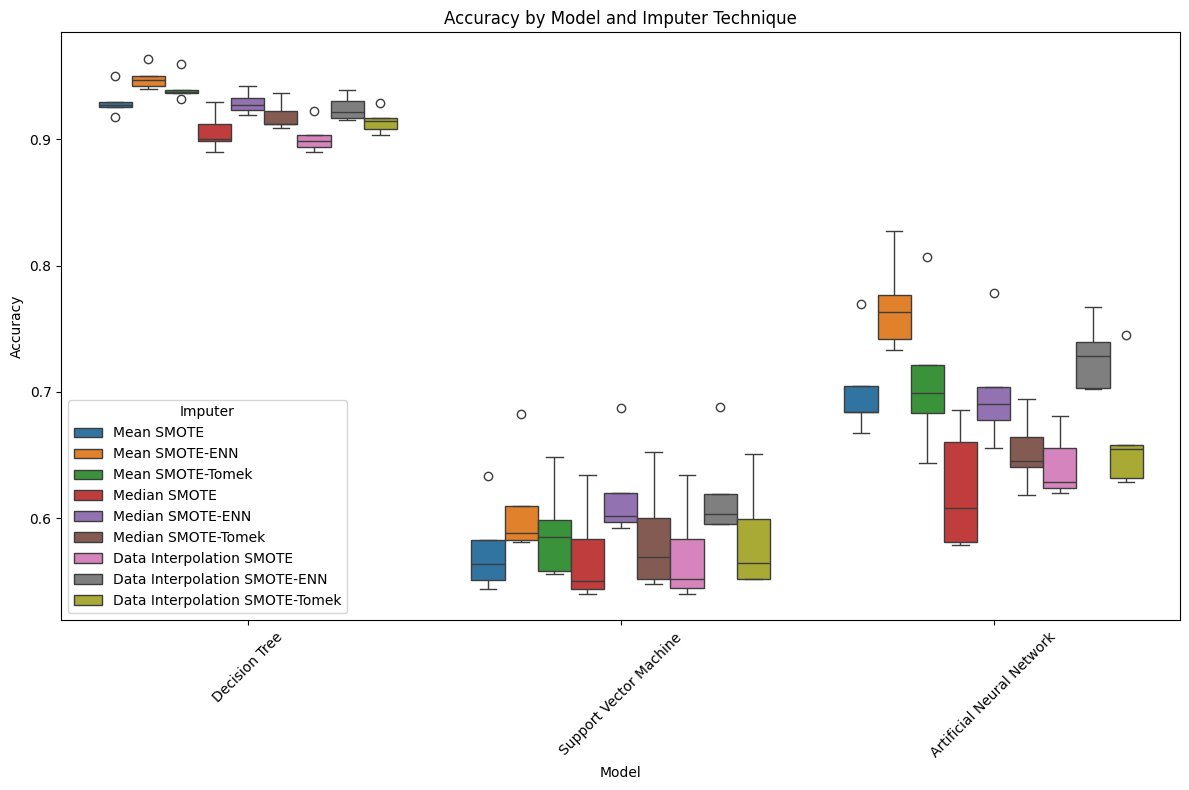

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot each metric for each model
def plot_metrics(results_df, metric):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Model', y=metric, hue='Imputer', data=results_df)
    plt.title(f'{metric} by Model and Imputer Technique')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title='Imputer', loc='best')
    plt.tight_layout()
    plt.show()

# List of metrics to plot
metrics_to_plot = ['Accuracy']

# Plot each metric for each model
for metric in metrics_to_plot:
    plot_metrics(results_df, metric)

### <b> 5.2. Examine Accuracy Results for First Year Data Across Various Models, Imputation Techniques, and Data Balancing Methods </b>

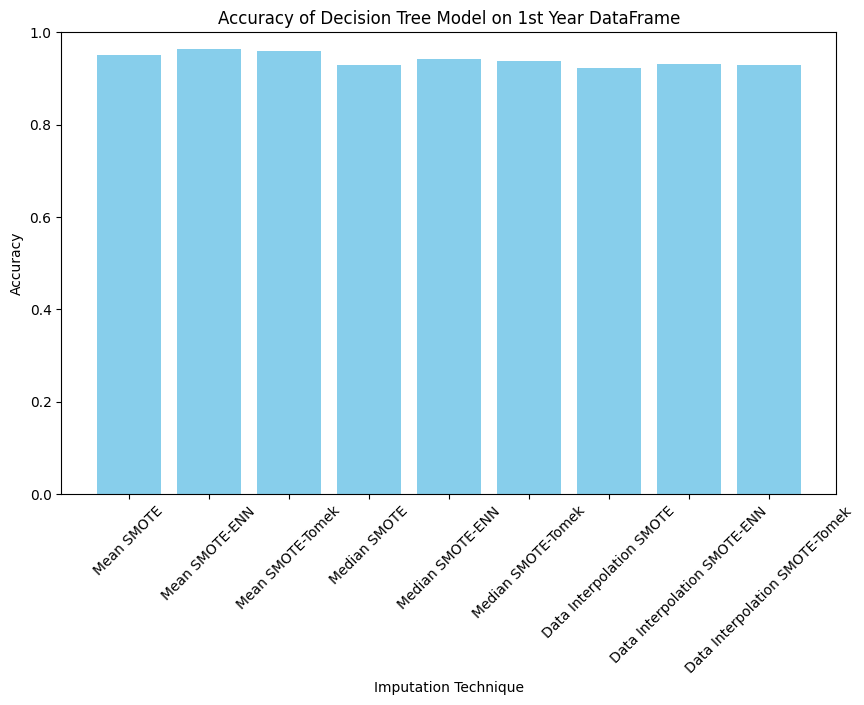

In [19]:
import matplotlib.pyplot as plt

# Filter the results DataFrame for Decision Tree model, first year, and accuracy metric
filtered_results = results_df[(results_df['Model'] == 'Decision Tree') & (results_df['Year'] == '1year')]

# Plot the accuracy values for different imputation techniques
plt.figure(figsize=(10, 6))
plt.bar(filtered_results['Imputer'], filtered_results['Accuracy'], color='skyblue')
plt.title('Accuracy of Decision Tree Model on 1st Year DataFrame')
plt.xlabel('Imputation Technique')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure accurate visualization
plt.xticks(rotation=45)
plt.show()

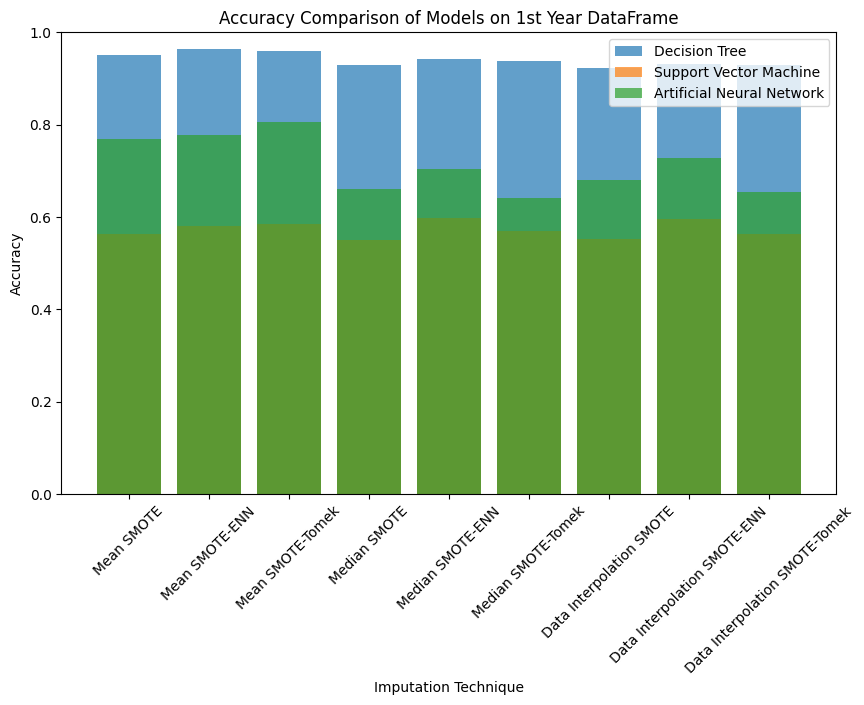

In [20]:
import matplotlib.pyplot as plt

# Filter the results DataFrame for accuracy metric and first-year dataframe
filtered_results_1year = results_df[results_df['Year'] == '1year']

# Plot the accuracy values for each model
plt.figure(figsize=(10, 6))
for model in filtered_results_1year['Model'].unique():
    filtered_results_model = filtered_results_1year[filtered_results_1year['Model'] == model]
    plt.bar(filtered_results_model['Imputer'], filtered_results_model['Accuracy'], alpha=0.7, label=model)

plt.title('Accuracy Comparison of Models on 1st Year DataFrame')
plt.xlabel('Imputation Technique')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure accurate visualization
plt.xticks(rotation=45)
plt.legend()
plt.show()

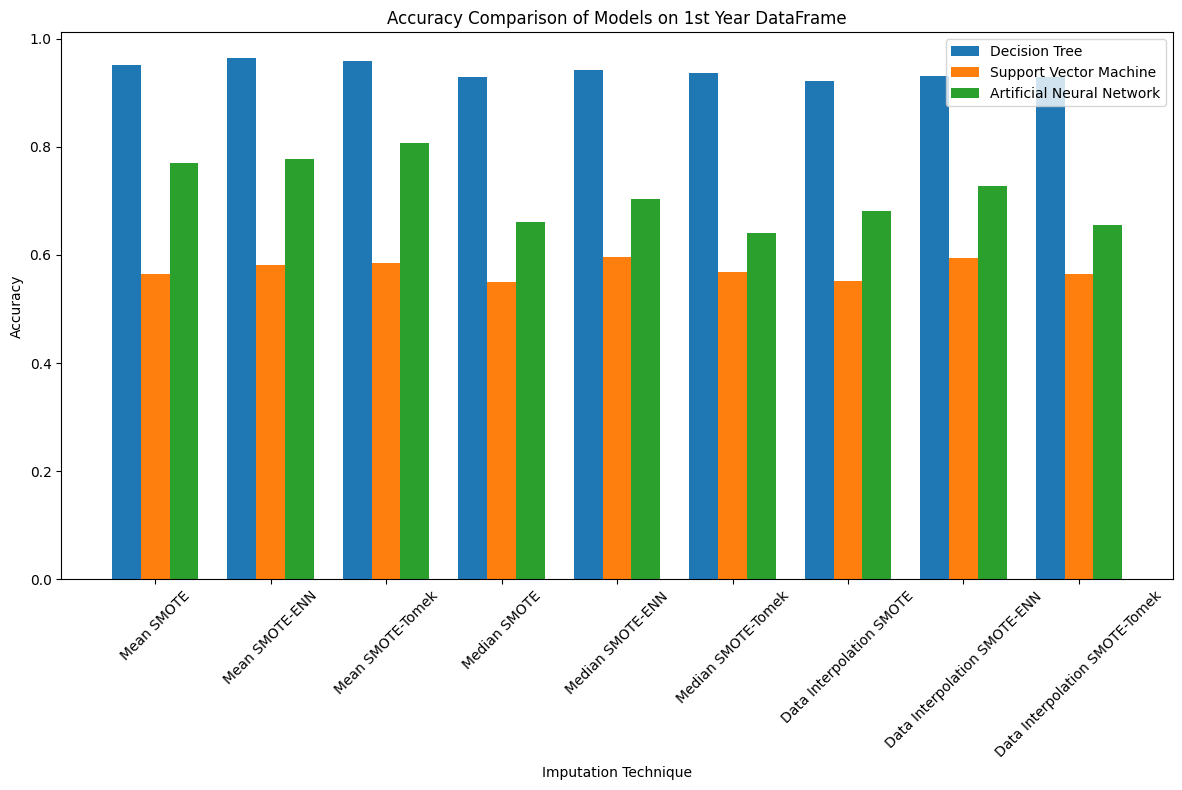

In [21]:
import numpy as np

# Get unique imputation techniques
imputation_techniques = filtered_results_1year['Imputer'].unique()

# Define the width of each bar
bar_width = 0.25

# Define the x-coordinate for each model within each imputation technique
x = np.arange(len(imputation_techniques))

# Plot the bar charts
plt.figure(figsize=(12, 8))
for i, model in enumerate(filtered_results_1year['Model'].unique()):
    accuracy_values = []
    for imputer in imputation_techniques:
        accuracy_values.append(filtered_results_1year[(filtered_results_1year['Model'] == model) &
                                                       (filtered_results_1year['Imputer'] == imputer)]['Accuracy'].values[0])
    plt.bar(x + (i * bar_width), accuracy_values, width=bar_width, label=model)

# Set the x-axis labels to be the imputation techniques
plt.xticks(x + (bar_width * (len(filtered_results_1year['Model'].unique()) - 1)) / 2, imputation_techniques, rotation=45)
plt.xlabel('Imputation Technique')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models on 1st Year DataFrame')
plt.legend()
plt.tight_layout()
plt.show()